# M3 Time Series Decomposition Assignment

In this analysis, we will decompose time series for private and public spending on construction in the United States from 2002 through 2013 with partial data for 2014.

### Visualizing the data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [36]:
construct = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
construct.head()

,Month,Date,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [37]:
construct.tail()

,Month,Date,Total Construction,Private Construction,Public Construction
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834
145,146,Feb-14,63368,46647,16721


Text(0.5, 0.98, 'Private vs Public Construction Spending from 2002-2014')

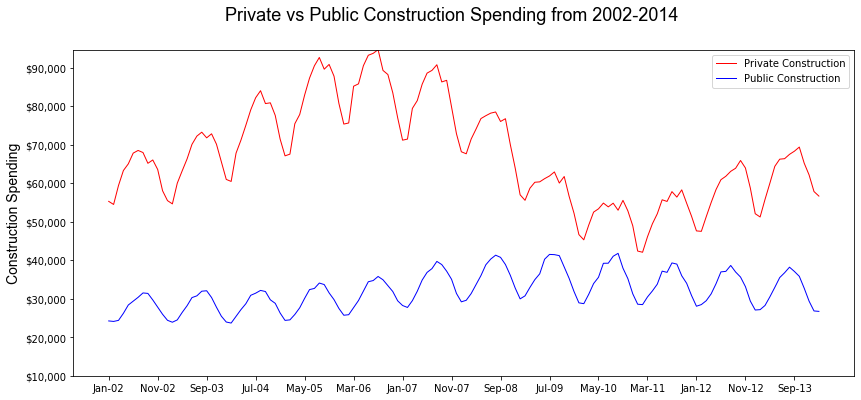

In [38]:
fig,ax = plt.subplots()
x = construct['Date']
y = construct['Private Construction']
y2 = construct['Public Construction']
#ax.plot(x,y)
ax.plot(x, y, color = 'r', label = 'Private Construction', linewidth=1)
ax.plot(x, y2, color= 'b', label= 'Public Construction', linewidth=1)

""" Enhance axes object """
ax.set_ylabel('Construction Spending',fontsize='14',fontname='Arial')
ax.set_xticks(x[::10])
ax.set_xticklabels(x[::10])
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_ylim(0,max(y)+10)
ax.legend(loc=1) #not necessary with only one series

""" Enhance figure object """
fig.set_size_inches(14,6)
fig.suptitle("Private vs Public Construction Spending from 2002-2014",fontsize='18',fontname='Arial')

## Breaking Down Trend Using Moving Averages

### Private Construction Moving Average

In [5]:
PVT = pd.DataFrame (construct, columns = ['Date','Private Construction'])
PVT.head()

,Date,Private Construction
0,Jan-02,45273
1,Feb-02,44475
2,Mar-02,49396
3,Apr-02,53283
4,May-02,55009


Private Construction: Total Squared Error:  15,119,231,546.71
       Date  Private Construction        MovAvg         sqErr
31   Aug-04                 74001  57881.566667  2.598361e+08
32   Sep-04                 70662  58839.166667  1.397794e+08
33   Oct-04                 70856  59712.066667  1.241873e+08
34   Nov-04                 67585  60427.400000  5.123124e+07
35   Dec-04                 61438  60904.133333  2.850136e+05
..      ...                   ...           ...           ...
141  Oct-13                 59370  49230.566667  1.028081e+08
142  Nov-13                 55191  50007.100000  2.687282e+07
143  Dec-13                 52132  50532.100000  2.559680e+06
144  Jan-14                 47827  50868.500000  9.250722e+06
145  Feb-14                 46647  50939.866667  1.842870e+07

[115 rows x 4 columns]


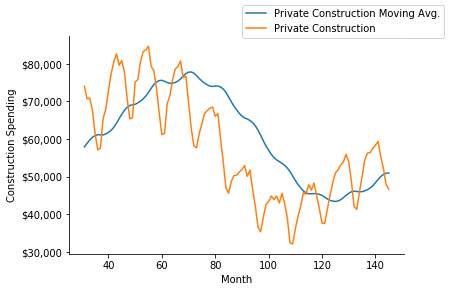

In [6]:
def sqErr(row):
    return float((row[1] - row[2])**2)
    
PVT['MovAvg'] = np.NaN
PVT['sqErr'] = np.NaN

window = 30
for i in range(window+1,len(PVT['Private Construction'])):
    PVT.loc[PVT.index[i],'MovAvg'] = sum(PVT.iloc[range(i-window-1,i)]['Private Construction'])/float(window)  
PVT['sqErr'] = PVT.apply(sqErr, axis ='columns')

PVT.dropna(how='any', inplace=True)

fig,ax = plt.subplots()
ax.plot(PVT['MovAvg'], label='Private Construction Moving Avg.')
ax.plot(PVT['Private Construction'], label='Private Construction')
ax.set_xlabel('Month')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_ylabel('Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

print('Private Construction: Total Squared Error: ', '{:,.2f}'.format(sum(PVT['sqErr'])))

print(PVT)


### Public Construction Moving Average

In [7]:
PUB = pd.DataFrame (construct, columns = ['Date','Public Construction'])
PUB.head()

,Date,Public Construction
0,Jan-02,14243
1,Feb-02,14113
2,Mar-02,14386
3,Apr-02,16221
4,May-02,18375


Public Construction: Total Squared Error:  2,215,399,456.21
       Date  Public Construction        MovAvg         sqErr
31   Aug-04                22164  18362.633333  1.445039e+07
32   Sep-04                21876  18626.666667  1.055817e+07
33   Oct-04                19726  18885.433333  7.065523e+05
34   Nov-04                18809  19063.433333  6.473632e+04
35   Dec-04                16295  19149.700000  8.149312e+06
..      ...                  ...           ...           ...
141  Oct-13                25823  24395.933333  2.036519e+06
142  Nov-13                22741  24574.666667  3.362333e+06
143  Dec-13                19369  24598.933333  2.735220e+07
144  Jan-14                16834  24452.066667  5.803494e+07
145  Feb-14                16721  24107.733333  5.456383e+07

[115 rows x 4 columns]


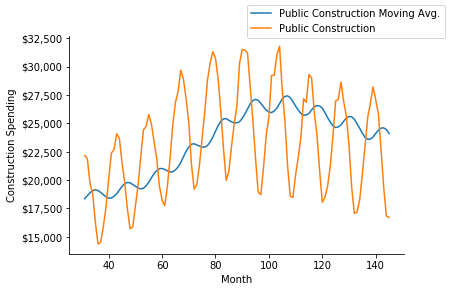

In [8]:

PUB['MovAvg'] = np.NaN
PUB['sqErr'] = np.NaN

window = 30
for i in range(window+1,len(PUB['Public Construction'])):
    PUB.loc[PUB.index[i],'MovAvg'] = sum(PUB.iloc[range(i-window-1,i)]['Public Construction'])/float(window)   
PUB['sqErr'] = PUB.apply(sqErr, axis ='columns')

PUB.dropna(how='any', inplace=True)

fig,ax = plt.subplots()
ax.plot(PUB['MovAvg'], label='Public Construction Moving Avg.')
ax.plot(PUB['Public Construction'], label='Public Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Spending')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

print('Public Construction: Total Squared Error: ', '{:,.2f}'.format(sum(PUB['sqErr'])))

print(PUB)

In [ ]:
## Decomposing Seasonal and Cyclic Variation to Find Fit

### Private Construction Spending Seasonal and Cyclic Variation

In [9]:
PVT['R1Private'] = PVT['Private Construction'] - PVT['MovAvg']
PVT['R1ErrorPrivate'] = abs((PVT['Private Construction'] - PVT['R1Private'])/PVT['Private Construction'])*100
PVT.style.format({
    'MovAvg': '{:.2f}'.format,
    'sqErr': '{:,.2f}'.format,
    'R1Private': '{:,.2f}'.format,
    'R1ErrorPrivate': '{:.2f}%'.format
})


,Date,Private Construction,MovAvg,sqErr,R1Private,R1ErrorPrivate
31,Aug-04,74001,57881.57,"259,836,130.99","16,119.43",78.22%
32,Sep-04,70662,58839.17,"139,779,388.03","11,822.83",83.27%
33,Oct-04,70856,59712.07,"124,187,250.14","11,143.93",84.27%
34,Nov-04,67585,60427.40,"51,231,237.76","7,157.60",89.41%
35,Dec-04,61438,60904.13,"285,013.62",533.87,99.13%
36,Jan-05,57094,61118.43,"16,196,063.65","-4,024.43",107.05%
37,Feb-05,57531,61094.87,"12,701,145.62","-3,563.87",106.19%
38,Mar-05,65425,61062.77,"19,029,079.65","4,362.23",93.33%
39,Apr-05,67829,61311.83,"42,473,461.36","6,517.17",90.39%
40,May-05,72862,61734.23,"123,827,190.99","11,127.77",84.73%


Average Residual:  -2964.5098550724624
Correlation, lag  1     0.941557156561211
Correlation, lag  2     0.8216119134872711
Correlation, lag  3     0.6728415338221021
Correlation, lag  4     0.5423246456532705
Correlation, lag  5     0.4532505027132632
Correlation, lag  6     0.41074613574134183
Correlation, lag  7     0.43155781476265237
Correlation, lag  8     0.4848263315744828
Correlation, lag  9     0.5747962351299216
Correlation, lag  10     0.6825968308194866
Correlation, lag  11     0.7670042532272816
Correlation, lag  12     0.7948677619653796
Correlation, lag  13     0.7109411183386263
Correlation, lag  14     0.5641188174593021
Correlation, lag  15     0.3817286543867644
Correlation, lag  16     0.21514711015911503
Correlation, lag  17     0.09091139869369447
Correlation, lag  18     0.018020637474371673
Correlation, lag  19     0.011368725297429235
Correlation, lag  20     0.031651036684471064
Correlation, lag  21     0.09359280498376385
Correlation, lag  22     0.173669328

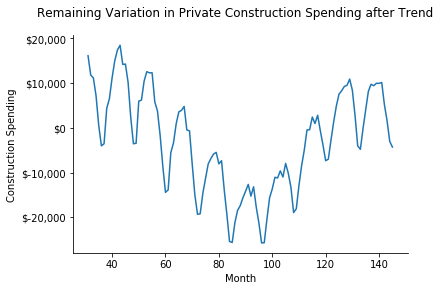

In [10]:
fig,ax = plt.subplots()
ax.plot(PVT['R1Private'])
ax.set_xlabel('Month')
ax.set_ylabel('Construction Spending')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Remaining Variation in Private Construction Spending after Trend")
print('Average Residual: ', sum(PVT['R1Private'])/len(PVT))

maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = PVT['R1Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

For seasonal variation in private construction spending, the max correlation occurs with 1 lag. This tells us that there is only one period per cycle. 

0 31     16119.433333
32     11822.833333
33     11143.933333
34      7157.600000
35       533.866667
           ...     
141    10139.433333
142     5183.900000
143     1599.900000
144    -3041.500000
145    -4292.866667
Name: R1Private, Length: 115, dtype: float64


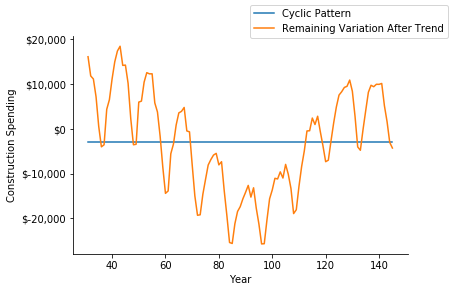

In [11]:
cycleLen = period   # see prior cell for computation of cyclicality period
avg = []            # a list to store the average demand for each period of the cycle
numCycles = int(len(PVT)/cycleLen + 0.5)
for j in range(cycleLen):
    if j + (numCycles-1) * cycleLen < len(PVT):
        d = PVT.iloc[range(j,j + (numCycles-1) * cycleLen+1,cycleLen)]['R1Private']
        print(j,d)
        avg.append(sum(d)/len(d))
    else:
        d = PVT.iloc[range(j,j + (numCycles-2) * cycleLen+1,cycleLen)]['R1Private']
        print(j,d)
        avg.append(sum(d)/len(d))
PVT['C'] = np.NaN
for i in range(len(PVT)):
    PVT.loc[PVT.index[i], 'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(PVT['C'],label='Cyclic Pattern')
ax.plot(PVT['R1Private'],label='Remaining Variation After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [12]:
print(cycleLen)

1


We can see from the graph above that Private Constructing Spending appears to follow a 12 month cyclic pattern of behavior.

In [13]:
PVT['R2Private'] = PVT['R1Private'] - PVT['C']
PVT['R2ErrorPrivate'] = abs(PVT['R2Private']/PVT['Private Construction'])*100
PVT['fit'] = PVT['MovAvg'] + PVT['C']

PVT.style.format({
    'R2Private': '{:,.2f}'.format,
    'R2ErrorPrivate': '{:.2f}%'.format,
    'fit': '{:.2f}'.format
})


,Date,Private Construction,MovAvg,sqErr,R1Private,R1ErrorPrivate,C,R2Private,R2ErrorPrivate,fit
31,Aug-04,74001,57881.566667,259836130.987778,16119.433333,78.217276,-2964.509855,"19,083.94",25.79%,54917.06
32,Sep-04,70662,58839.166667,139779388.027778,11822.833333,83.268471,-2964.509855,"14,787.34",20.93%,55874.66
33,Oct-04,70856,59712.066667,124187250.137778,11143.933333,84.272421,-2964.509855,"14,108.44",19.91%,56747.56
34,Nov-04,67585,60427.400000,51231237.760000,7157.600000,89.409484,-2964.509855,"10,122.11",14.98%,57462.89
35,Dec-04,61438,60904.133333,285013.617778,533.866667,99.131048,-2964.509855,"3,498.38",5.69%,57939.62
36,Jan-05,57094,61118.433333,16196063.654444,-4024.433333,107.048785,-2964.509855,"-1,059.92",1.86%,58153.92
37,Feb-05,57531,61094.866667,12701145.617778,-3563.866667,106.194689,-2964.509855,-599.36,1.04%,58130.36
38,Mar-05,65425,61062.766667,19029079.654444,4362.233333,93.332467,-2964.509855,"7,326.74",11.20%,58098.26
39,Apr-05,67829,61311.833333,42473461.361111,6517.166667,90.391769,-2964.509855,"9,481.68",13.98%,58347.32
40,May-05,72862,61734.233333,123827190.987778,11127.766667,84.727613,-2964.509855,"14,092.28",19.34%,58769.72


### Public Construction Spending Seasonal and Cyclic Variation

In [14]:
PUB['R1Public'] = PUB['Public Construction'] - PUB['MovAvg']
PUB['R1ErrorPublic'] = abs((PUB['Public Construction'] - PUB['R1Public'])/PUB['Public Construction'])
PUB.style.format({
    'MovAvg': '{:.2f}'.format,
    'sqErr': '{:,.2f}'.format,
    'R1Public': '{:,.2f}'.format,
    'R1ErrorPublic': '{:.2f}%'.format
})


,Date,Public Construction,MovAvg,sqErr,R1Public,R1ErrorPublic
31,Aug-04,22164,18362.63,"14,450,388.53","3,801.37",0.83%
32,Sep-04,21876,18626.67,"10,558,167.11","3,249.33",0.85%
33,Oct-04,19726,18885.43,"706,552.32",840.57,0.96%
34,Nov-04,18809,19063.43,"64,736.32",-254.43,1.01%
35,Dec-04,16295,19149.70,"8,149,312.09","-2,854.70",1.18%
36,Jan-05,14380,19080.37,"22,093,446.80","-4,700.37",1.33%
37,Feb-05,14517,18913.67,"19,330,677.78","-4,396.67",1.30%
38,Mar-05,15920,18718.60,"7,832,161.96","-2,798.60",1.18%
39,Apr-05,17656,18532.37,"768,018.53",-876.37,1.05%
40,May-05,20097,18408.07,"2,852,495.80","1,688.93",0.92%


Average Residual:  -141.46637681159456
Correlation, lag  1     0.8733646496205787
Correlation, lag  2     0.5601304177754588
Correlation, lag  3     0.13907215710161486
Correlation, lag  4     -0.2788543529450397
Correlation, lag  5     -0.5671712481140203
Correlation, lag  6     -0.6687330951186213
Correlation, lag  7     -0.5629380434647444
Correlation, lag  8     -0.2687640111385459
Correlation, lag  9     0.14210443509469317
Correlation, lag  10     0.5410107112168231
Correlation, lag  11     0.8395946225794325
Correlation, lag  12     0.9607673905828731
Correlation, lag  13     0.8445799539688872
Correlation, lag  14     0.5418163687502721
Correlation, lag  15     0.11574588292472139
Correlation, lag  16     -0.3046754791961522
Correlation, lag  17     -0.5987267079721985
Correlation, lag  18     -0.708030757256956
Correlation, lag  19     -0.6062123433557755
Correlation, lag  20     -0.3190384987821203
Correlation, lag  21     0.08279660797938945
Correlation, lag  22     0.476381

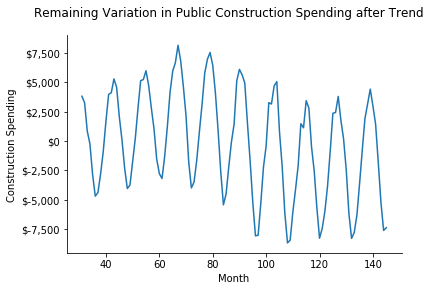

In [15]:
fig,ax = plt.subplots()
ax.plot(PUB['R1Public'])
ax.set_xlabel('Month')
ax.set_ylabel('Construction Spending')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle("Remaining Variation in Public Construction Spending after Trend")
print('Average Residual: ', sum(PUB['R1Public'])/len(PUB))

maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = PUB['R1Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

For seasonal variation in Public Construction Spending, the max correlation occurs at 12 lags. This tells us that there are 12 periods per cycle.

0 31     3801.366667
43     5280.166667
55     5975.100000
67     8143.566667
79     7528.000000
91     5628.266667
103    4685.533333
115    3424.200000
127    3785.200000
139    4407.700000
Name: R1Public, dtype: float64
1 32     3249.333333
44     4564.700000
56     4718.900000
68     6811.133333
80     6442.333333
92     4926.100000
104    5046.133333
116    2806.333333
128    1759.733333
140    2977.100000
Name: R1Public, dtype: float64
2 33      840.566667
45     2072.733333
57     2805.433333
69     4613.666667
81     4086.133333
93     1509.833333
105     785.000000
117    -501.400000
129     179.933333
141    1427.066667
Name: R1Public, dtype: float64
3 34     -254.433333
46       95.100000
58     1034.733333
70     2132.266667
82      903.100000
94    -1692.733333
106   -2150.833333
118   -2545.100000
130   -2453.866667
142   -1833.666667
Name: R1Public, dtype: float64
4 35    -2854.700000
47    -2311.933333
59    -1535.966667
71    -1782.033333
83    -2626.533333
95    -5223

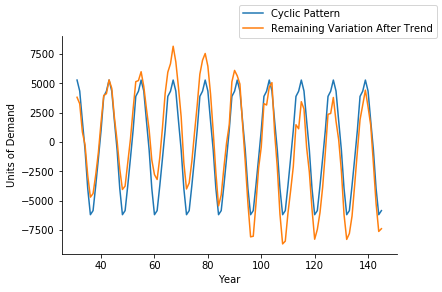

In [16]:
cycleLen = period   # see prior cell for computation of cyclicality period
avg = []            # a list to store the average demand for each period of the cycle
numCycles = int(len(PUB)/cycleLen + 0.5)
for j in range(cycleLen):
    if j + (numCycles-1) * cycleLen < len(PUB):
        d = PUB.iloc[range(j,j + (numCycles-1) * cycleLen+1,cycleLen)]['R1Public']
        print(j,d)
        avg.append(sum(d)/len(d))
    else:
        d = PUB.iloc[range(j,j + (numCycles-2) * cycleLen+1,cycleLen)]['R1Public']
        print(j,d)
        avg.append(sum(d)/len(d))
PUB['C'] = np.NaN
for i in range(len(PUB)):
    PUB.loc[PUB.index[i], 'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(PUB['C'],label='Cyclic Pattern')
ax.plot(PUB['R1Public'],label='Remaining Variation After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [17]:
print(cycleLen)

12


Like Private Construction Spending, Public Constructing Spending also appears to follow a 12 month cyclic pattern of behavior.

In [22]:
PUB['R2Public'] = PUB['R1Public'] - PUB['C']
PUB['R2ErrorPublic'] = abs(PUB['R2Public']/PUB['Public Construction'])*100
PUB['fit'] = PUB['MovAvg'] + PUB['C']

PUB.style.format({
    'R2Public': '{:,.2f}'.format,
    'R2ErrorPublic': '{:.2f}%'.format,
    'fit': '{:.2f}'.format
})

,Date,Public Construction,MovAvg,sqErr,R1Public,R1ErrorPublic,C,R2Public,R2ErrorPublic,fit
31,Aug-04,22164,18362.633333,14450388.534444,3801.366667,0.828489,5265.910000,"-1,464.54",6.61%,23628.54
32,Sep-04,21876,18626.666667,10558167.111111,3249.333333,0.851466,4330.180000,"-1,080.85",4.94%,22956.85
33,Oct-04,19726,18885.433333,706552.321111,840.566667,0.957388,1781.896667,-941.33,4.77%,20667.33
34,Nov-04,18809,19063.433333,64736.321111,-254.433333,1.013527,-676.543333,422.11,2.24%,18386.89
35,Dec-04,16295,19149.700000,8149312.090000,-2854.700000,1.175189,-3958.703333,"1,104.00",6.78%,15191.00
36,Jan-05,14380,19080.366667,22093446.801111,-4700.366667,1.326868,-6192.690000,"1,492.32",10.38%,12887.68
37,Feb-05,14517,18913.666667,19330677.777778,-4396.666667,1.302863,-5846.213333,"1,449.55",9.99%,13067.45
38,Mar-05,15920,18718.600000,7832161.960000,-2798.600000,1.175791,-3712.011111,913.41,5.74%,15006.59
39,Apr-05,17656,18532.366667,768018.534444,-876.366667,1.049636,-1395.492593,519.13,2.94%,17136.87
40,May-05,20097,18408.066667,2852495.804444,1688.933333,0.915961,992.448148,696.49,3.47%,19400.51


Private Construction Average Error:  17.24%
Public Construction Average Error:  7.41%


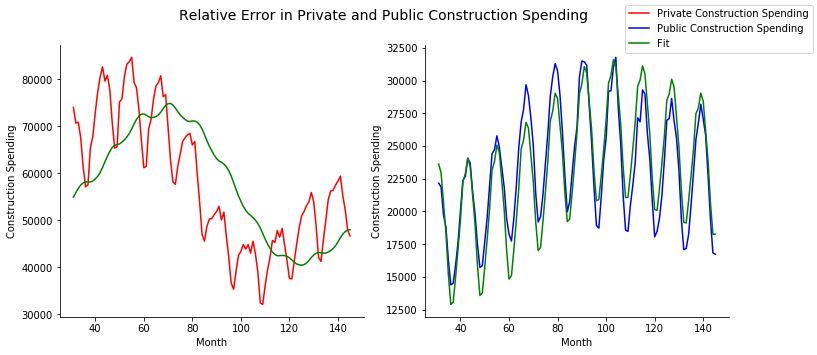

In [34]:
fig,ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(12)
fig.suptitle("Relative Error in Private and Public Construction Spending", fontsize="14")

ax[0].plot(PVT['Private Construction'], color = 'r', label='Private Construction Spending')
ax[0].plot(PVT['fit'], color = 'g')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Construction Spending')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[1].plot(PUB['Public Construction'], color = 'b', label='Public Construction Spending')
ax[1].plot(PUB['fit'], color = 'g', label = 'Fit')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Construction Spending')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

fig.legend(loc = 'upper right')

print('Private Construction Average Error: ', '{:.2f}%'.format(sum(PVT['R2ErrorPrivate']/len(PVT))))

print('Public Construction Average Error: ', '{:.2f}%'.format(sum(PUB['R2ErrorPublic']/len(PUB))))

## Findings:

After decomposing seasonal and cyclic variation from the Private and Public Construction Spending series, we were able to achieve a relative average error of 17.24% and 7.41% respectively. We can see in the comparison above, the fit for Public construction spending tracks the variation in the original series much closer than the fit for Private Construction Spending.